In [199]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [101]:
df = pd.read_csv('ks-projects-201801.csv', encoding='latin_1')

In [102]:
df
df = df[df.state != 'undefined']

In [103]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375099 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                375099 non-null  int64  
 1   name              375095 non-null  object 
 2   category          375099 non-null  object 
 3   main_category     375099 non-null  object 
 4   currency          375099 non-null  object 
 5   deadline          375099 non-null  object 
 6   goal              375099 non-null  float64
 7   launched          375099 non-null  object 
 8   pledged           375099 non-null  float64
 9   state             375099 non-null  object 
 10  backers           375099 non-null  int64  
 11  country           375099 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  375099 non-null  float64
 14  usd_goal_real     375099 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 45.8+ MB


In [105]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.750990e+05,3.750990e+05,3.750990e+05,375099.000000,3.748640e+05,3.750990e+05,3.750990e+05
mean,1.074632e+09,4.950504e+04,9.753282e+03,106.620436,7.036729e+03,9.123935e+03,4.584708e+04
std,6.191294e+08,1.188989e+06,9.608575e+04,911.423593,7.863975e+04,9.140142e+04,1.158404e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.380782e+08,2.000000e+03,3.100000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075217e+09,5.500000e+03,6.200000e+02,12.000000,3.947200e+02,6.250000e+02,5.500000e+03
75%,1.610128e+09,1.650000e+04,4.080000e+03,57.000000,3.034090e+03,4.050180e+03,1.600000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [106]:
unique_state = df['state'].unique()
print(unique_state)

['failed' 'canceled' 'successful' 'live' 'suspended']


In [107]:
unique_country = df['country'].unique()
print(unique_country)

['GB' 'US' 'CA' 'AU' 'NO' 'IT' 'DE' 'IE' 'MX' 'ES' 'SE' 'FR' 'NL' 'NZ'
 'CH' 'AT' 'DK' 'BE' 'HK' 'LU' 'SG' 'N,0"' 'JP']


Text(0.5, 1.0, 'state count')

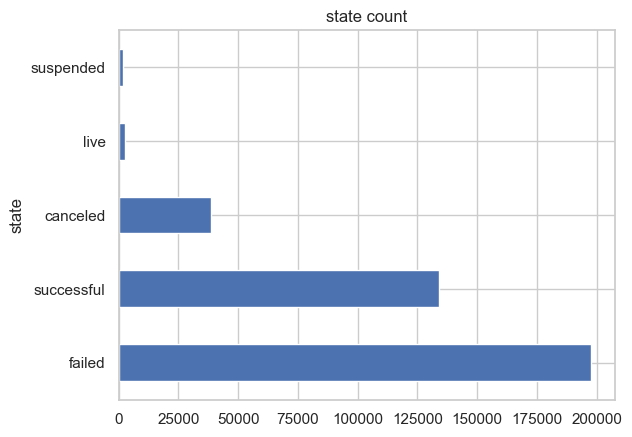

In [169]:
df['state'].value_counts().plot.barh().set_title('state count')

Text(0.5, 1.0, 'country count')

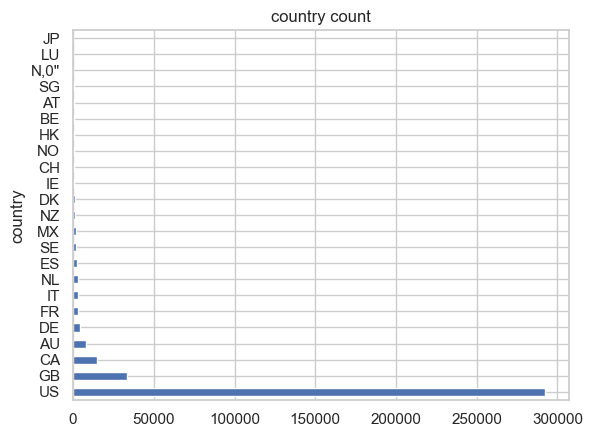

In [170]:
df['country'].value_counts().plot.barh().set_title('country count')

In [109]:
df_gb = df.loc[df['country'] == 'GB']
df_us = df.loc[df['country'] == 'US']
df_ca = df.loc[df['country'] == 'CA']
df_au = df.loc[df['country'] == 'AU']
df_no = df.loc[df['country'] == 'NO']
df_it = df.loc[df['country'] == 'IT']
df_de = df.loc[df['country'] == 'DE']
df_ie = df.loc[df['country'] == 'IE']
df_mx = df.loc[df['country'] == 'MX']
df_es = df.loc[df['country'] == 'ES']
df_se = df.loc[df['country'] == 'SE']
df_fr = df.loc[df['country'] == 'FR']
df_nl = df.loc[df['country'] == 'NL']
df_nz = df.loc[df['country'] == 'NZ']
df_ch = df.loc[df['country'] == 'CH']
df_at = df.loc[df['country'] == 'AT']
df_dk = df.loc[df['country'] == 'DK']
df_be = df.loc[df['country'] == 'BE']
df_hk = df.loc[df['country'] == 'HK']
df_lu = df.loc[df['country'] == 'LU']
df_sg = df.loc[df['country'] == 'SG']
df_jp = df.loc[df['country'] == 'JP']

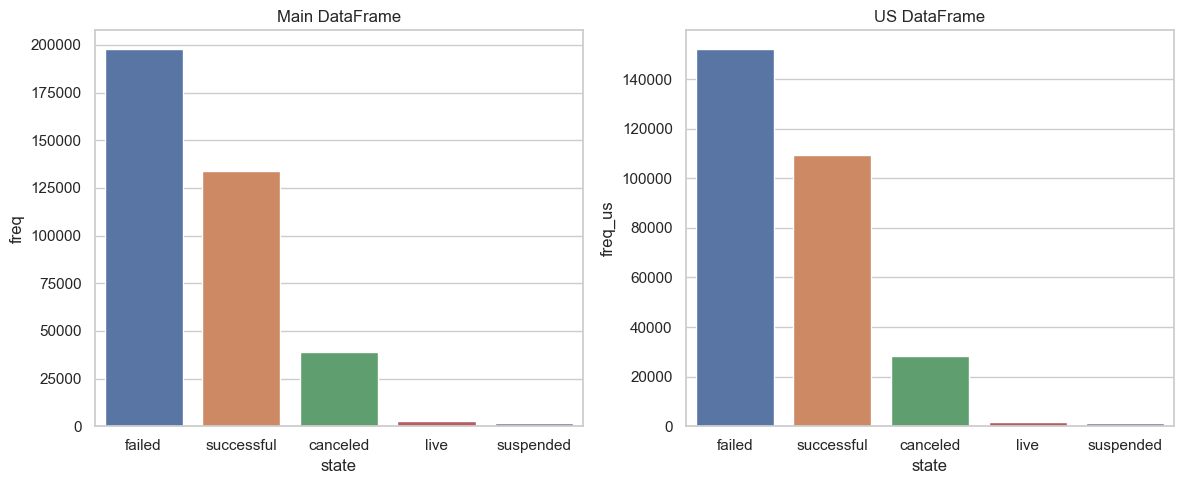

In [194]:
freq_count_df = df['state'].value_counts().reset_index(name='freq')
freq_count_df.columns = ['state', 'freq']

freq_count_df_us = df_us['state'].value_counts().reset_index(name='freq_us')
freq_count_df_us.columns = ['state', 'freq_us']


sns.set(style='whitegrid')
plt.figure(figsize=(12, 5))

# Subplot 1 - Bar plot for main data frame
plt.subplot(1, 2, 1)
sns.barplot(x='state', y='freq', data=freq_count_df)
plt.title('Main DataFrame')

# Subplot 2 - Bar plot for data frame US
plt.subplot(1, 2, 2)
sns.barplot(x='state', y='freq_us', data=freq_count_df_us)
plt.title('US DataFrame')

plt.tight_layout()
plt.show()



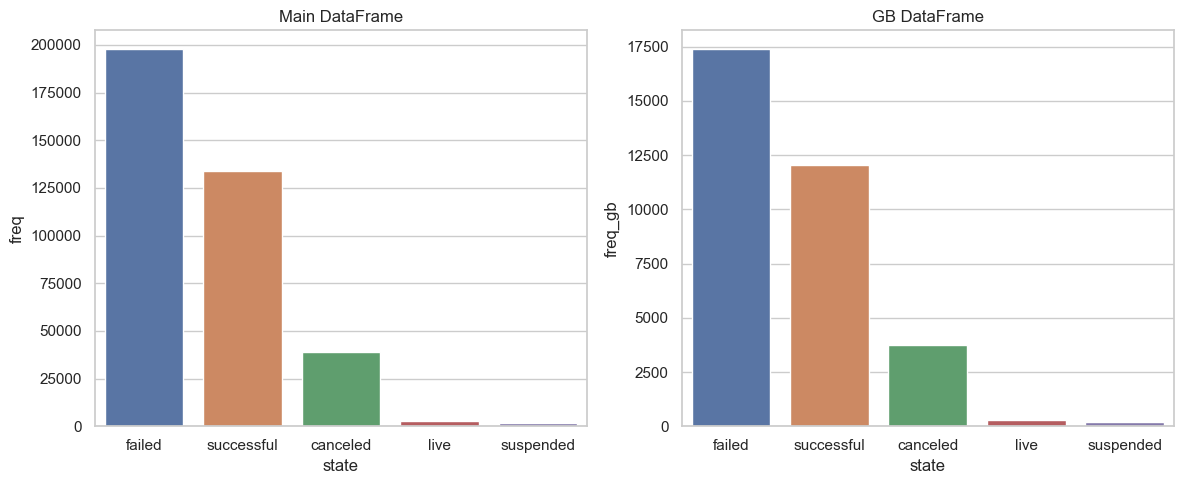

In [111]:
freq_count_df = df['state'].value_counts().reset_index(name='freq')
freq_count_df.columns = ['state', 'freq']

freq_count_df_gb = df_gb['state'].value_counts().reset_index(name='freq_gb')
freq_count_df_gb.columns = ['state', 'freq_gb']


sns.set(style='whitegrid')
plt.figure(figsize=(12, 5))

# Subplot 1 - Bar plot for main data frame
plt.subplot(1, 2, 1)
sns.barplot(x='state', y='freq', data=freq_count_df)
plt.title('Main DataFrame')

# Subplot 2 - Bar plot for data frame GB
plt.subplot(1, 2, 2)
sns.barplot(x='state', y='freq_gb', data=freq_count_df_gb)
plt.title('GB DataFrame')

plt.tight_layout()
plt.show()

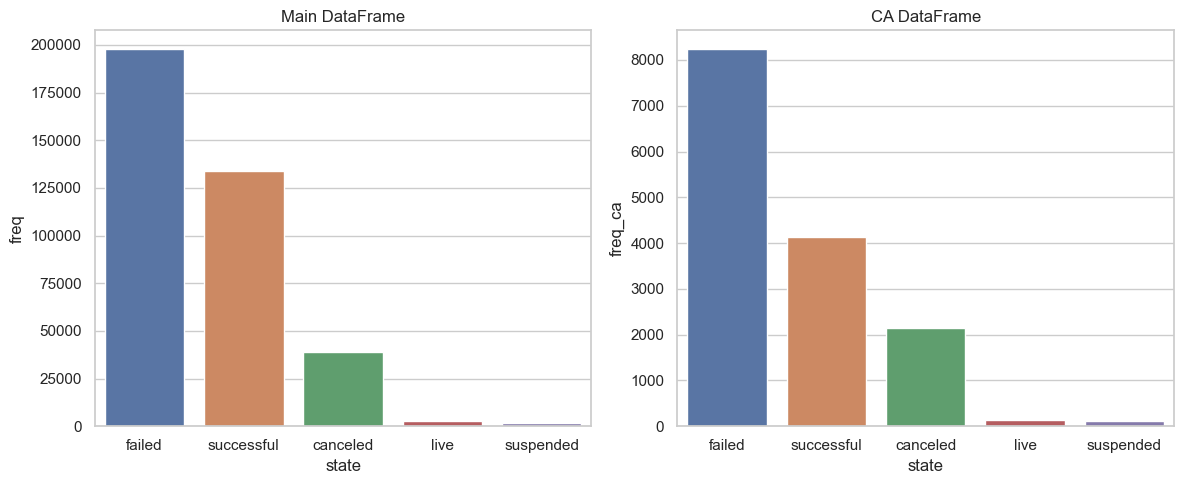

In [112]:
freq_count_df = df['state'].value_counts().reset_index(name='freq')
freq_count_df.columns = ['state', 'freq']

freq_count_df_ca = df_ca['state'].value_counts().reset_index(name='freq_ca')
freq_count_df_ca.columns = ['state', 'freq_ca']


sns.set(style='whitegrid')
plt.figure(figsize=(12, 5))

# Subplot 1 - Bar plot for main data frame
plt.subplot(1, 2, 1)
sns.barplot(x='state', y='freq', data=freq_count_df)
plt.title('Main DataFrame')

# Subplot 2 - Bar plot for data frame CA
plt.subplot(1, 2, 2)
sns.barplot(x='state', y='freq_ca', data=freq_count_df_ca)
plt.title('CA DataFrame')

plt.tight_layout()
plt.show()

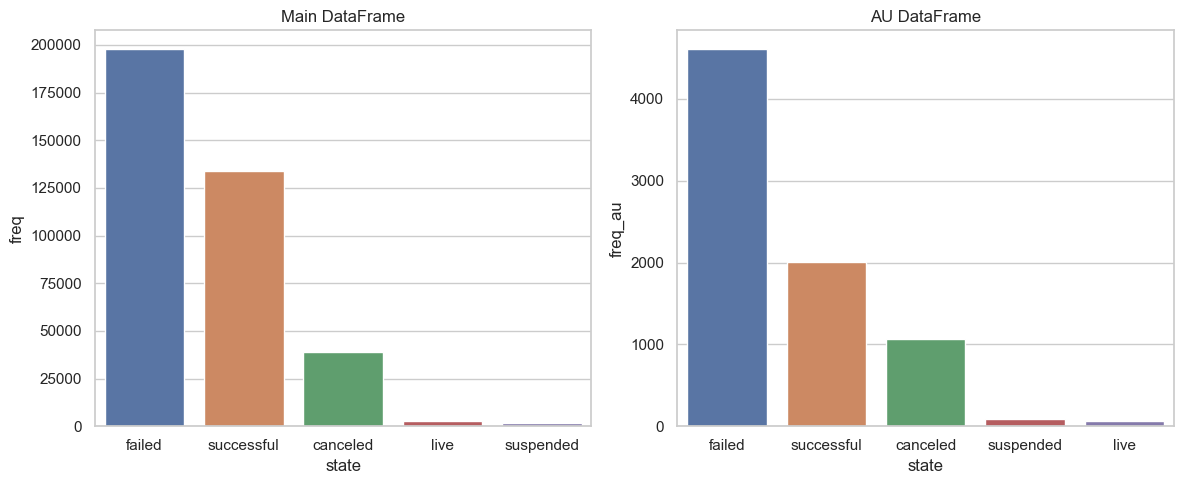

In [117]:
freq_count_df = df['state'].value_counts().reset_index(name='freq')
freq_count_df.columns = ['state', 'freq']

freq_count_df_au = df_au['state'].value_counts().reset_index(name='freq_au')
freq_count_df_au.columns = ['state', 'freq_au']


sns.set(style='whitegrid')
plt.figure(figsize=(12, 5))

# Subplot 1 - Bar plot for main data frame
plt.subplot(1, 2, 1)
sns.barplot(x='state', y='freq', data=freq_count_df)
plt.title('Main DataFrame')

# Subplot 2 - Bar plot for data frame AU
plt.subplot(1, 2, 2)
sns.barplot(x='state', y='freq_au', data=freq_count_df_au)
plt.title('AU DataFrame')

plt.tight_layout()
plt.show()

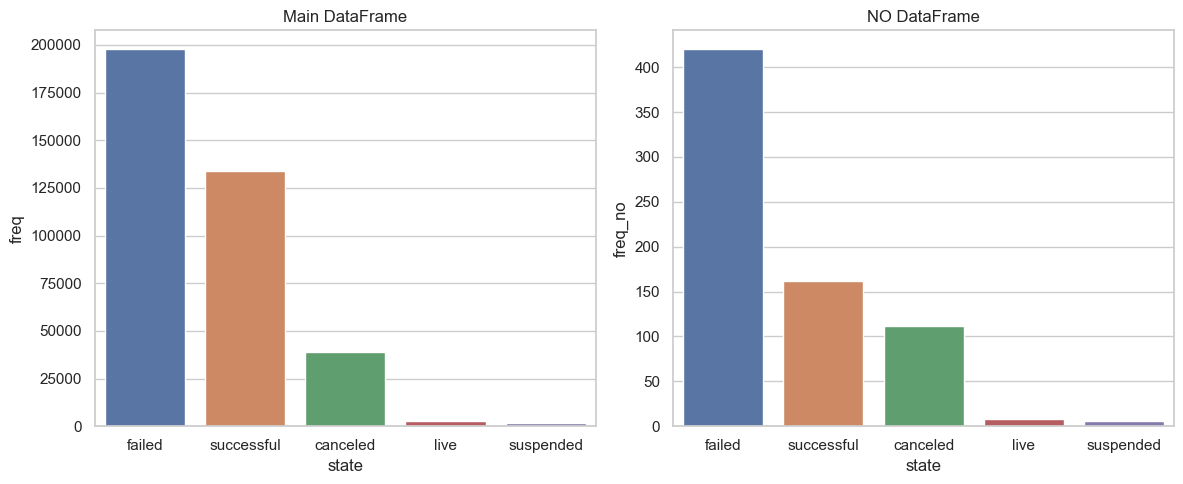

In [118]:
freq_count_df = df['state'].value_counts().reset_index(name='freq')
freq_count_df.columns = ['state', 'freq']

freq_count_df_no = df_no['state'].value_counts().reset_index(name='freq_no')
freq_count_df_no.columns = ['state', 'freq_no']


sns.set(style='whitegrid')
plt.figure(figsize=(12, 5))

# Subplot 1 - Bar plot for main data frame
plt.subplot(1, 2, 1)
sns.barplot(x='state', y='freq', data=freq_count_df)
plt.title('Main DataFrame')

# Subplot 2 - Bar plot for data frame NO
plt.subplot(1, 2, 2)
sns.barplot(x='state', y='freq_no', data=freq_count_df_no)
plt.title('NO DataFrame')

plt.tight_layout()
plt.show()

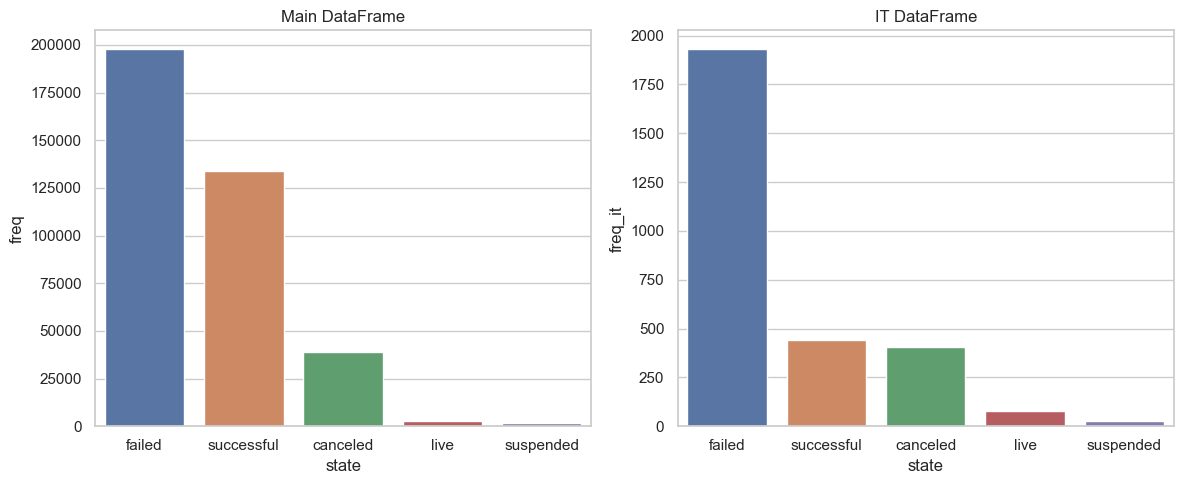

In [119]:
freq_count_df = df['state'].value_counts().reset_index(name='freq')
freq_count_df.columns = ['state', 'freq']

freq_count_df_it = df_it['state'].value_counts().reset_index(name='freq_it')
freq_count_df_it.columns = ['state', 'freq_it']


sns.set(style='whitegrid')
plt.figure(figsize=(12, 5))

# Subplot 1 - Bar plot for main data frame
plt.subplot(1, 2, 1)
sns.barplot(x='state', y='freq', data=freq_count_df)
plt.title('Main DataFrame')

# Subplot 2 - Bar plot for data frame IT
plt.subplot(1, 2, 2)
sns.barplot(x='state', y='freq_it', data=freq_count_df_it)
plt.title('IT DataFrame')

plt.tight_layout()
plt.show()

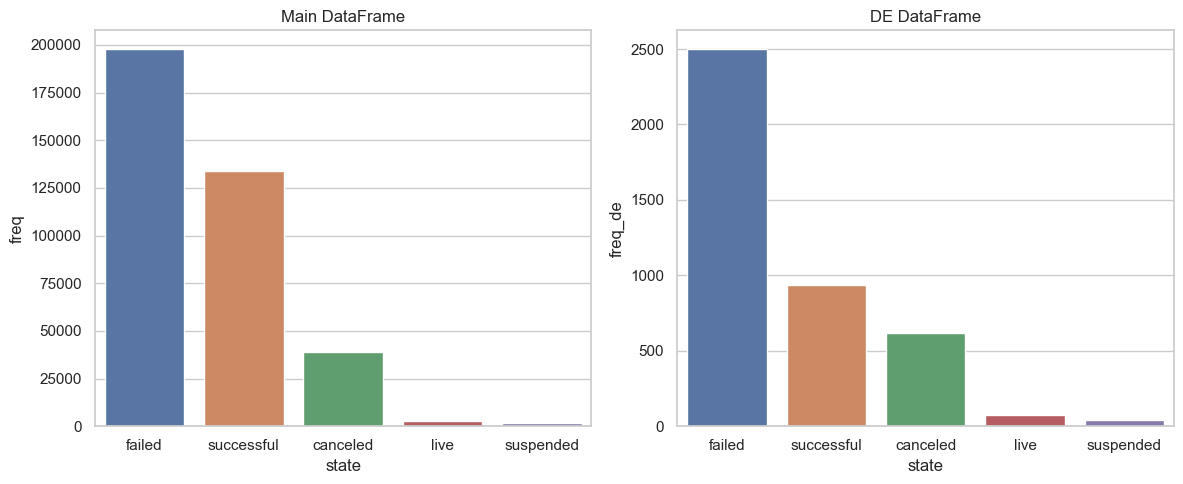

In [120]:
freq_count_df = df['state'].value_counts().reset_index(name='freq')
freq_count_df.columns = ['state', 'freq']

freq_count_df_de = df_de['state'].value_counts().reset_index(name='freq_de')
freq_count_df_de.columns = ['state', 'freq_de']


sns.set(style='whitegrid')
plt.figure(figsize=(12, 5))

# Subplot 1 - Bar plot for main data frame
plt.subplot(1, 2, 1)
sns.barplot(x='state', y='freq', data=freq_count_df)
plt.title('Main DataFrame')

# Subplot 2 - Bar plot for data frame DE
plt.subplot(1, 2, 2)
sns.barplot(x='state', y='freq_de', data=freq_count_df_de)
plt.title('DE DataFrame')

plt.tight_layout()
plt.show()

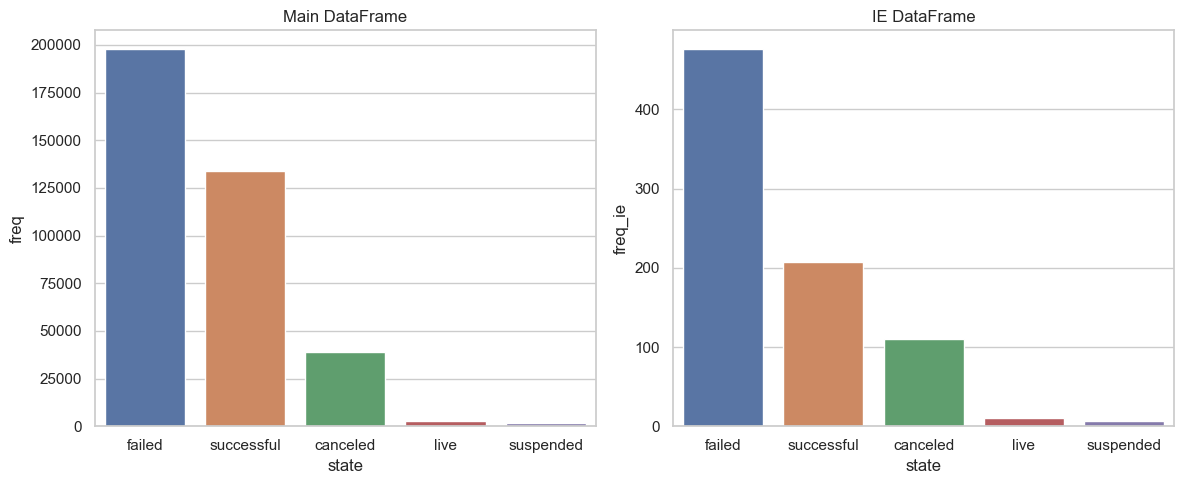

In [122]:
freq_count_df = df['state'].value_counts().reset_index(name='freq')
freq_count_df.columns = ['state', 'freq']

freq_count_df_ie = df_ie['state'].value_counts().reset_index(name='freq_ie')
freq_count_df_ie.columns = ['state', 'freq_ie']


sns.set(style='whitegrid')
plt.figure(figsize=(12, 5))

# Subplot 1 - Bar plot for main data frame
plt.subplot(1, 2, 1)
sns.barplot(x='state', y='freq', data=freq_count_df)
plt.title('Main DataFrame')

# Subplot 2 - Bar plot for data frame IE
plt.subplot(1, 2, 2)
sns.barplot(x='state', y='freq_ie', data=freq_count_df_ie)
plt.title('IE DataFrame')

plt.tight_layout()
plt.show()

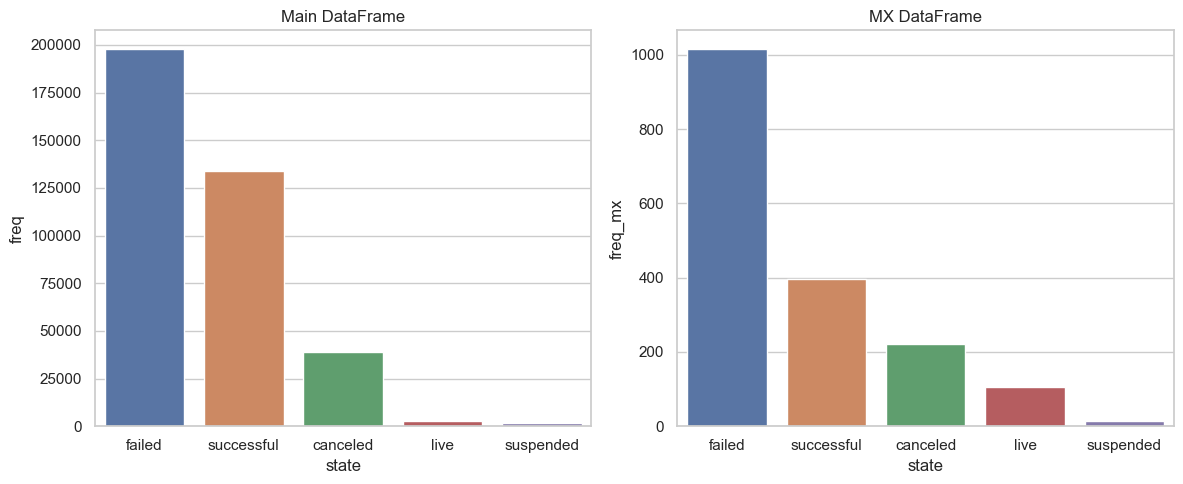

In [123]:
freq_count_df = df['state'].value_counts().reset_index(name='freq')
freq_count_df.columns = ['state', 'freq']

freq_count_df_mx = df_mx['state'].value_counts().reset_index(name='freq_mx')
freq_count_df_mx.columns = ['state', 'freq_mx']


sns.set(style='whitegrid')
plt.figure(figsize=(12, 5))

# Subplot 1 - Bar plot for main data frame
plt.subplot(1, 2, 1)
sns.barplot(x='state', y='freq', data=freq_count_df)
plt.title('Main DataFrame')

# Subplot 2 - Bar plot for data frame MX
plt.subplot(1, 2, 2)
sns.barplot(x='state', y='freq_mx', data=freq_count_df_mx)
plt.title('MX DataFrame')

plt.tight_layout()
plt.show()

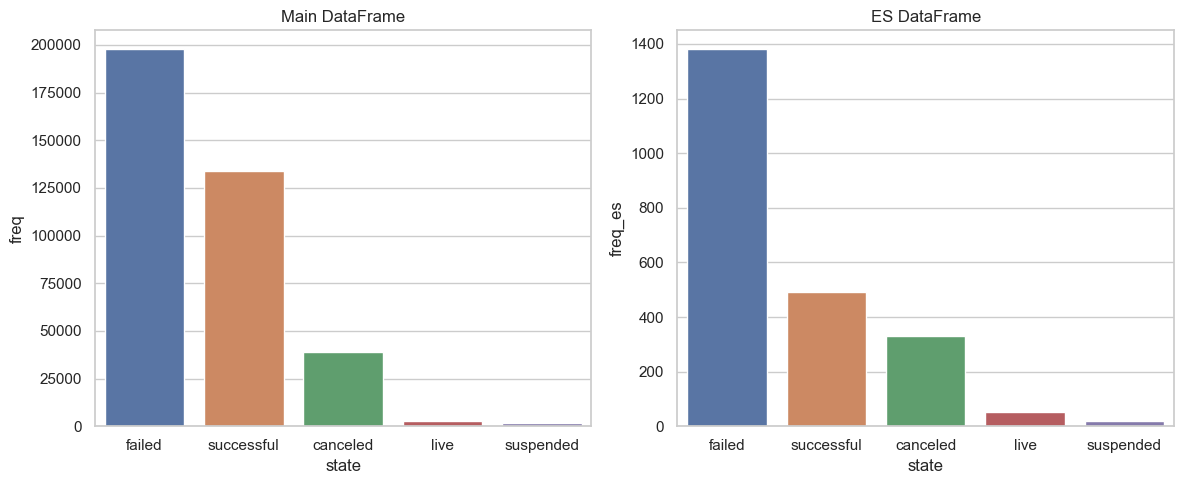

In [125]:
freq_count_df = df['state'].value_counts().reset_index(name='freq')
freq_count_df.columns = ['state', 'freq']

freq_count_df_es = df_es['state'].value_counts().reset_index(name='freq_es')
freq_count_df_es.columns = ['state', 'freq_es']


sns.set(style='whitegrid')
plt.figure(figsize=(12, 5))

# Subplot 1 - Bar plot for main data frame
plt.subplot(1, 2, 1)
sns.barplot(x='state', y='freq', data=freq_count_df)
plt.title('Main DataFrame')

# Subplot 2 - Bar plot for data frame ES
plt.subplot(1, 2, 2)
sns.barplot(x='state', y='freq_es', data=freq_count_df_es)
plt.title('ES DataFrame')

plt.tight_layout()
plt.show()

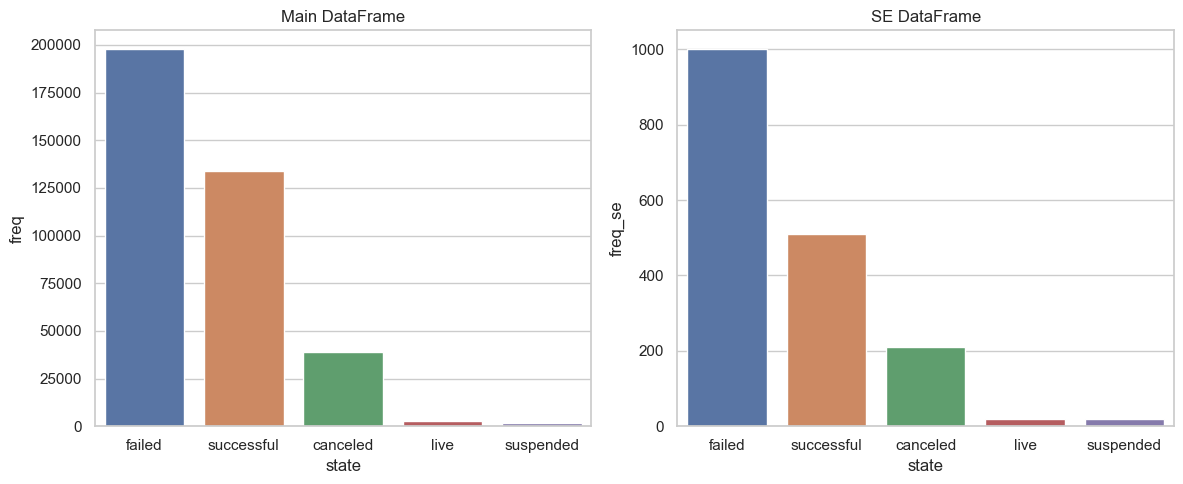

In [127]:
freq_count_df = df['state'].value_counts().reset_index(name='freq')
freq_count_df.columns = ['state', 'freq']

freq_count_df_se = df_se['state'].value_counts().reset_index(name='freq_se')
freq_count_df_se.columns = ['state', 'freq_se']


sns.set(style='whitegrid')
plt.figure(figsize=(12, 5))

# Subplot 1 - Bar plot for main data frame
plt.subplot(1, 2, 1)
sns.barplot(x='state', y='freq', data=freq_count_df)
plt.title('Main DataFrame')

# Subplot 2 - Bar plot for data frame SE
plt.subplot(1, 2, 2)
sns.barplot(x='state', y='freq_se', data=freq_count_df_se)
plt.title('SE DataFrame')

plt.tight_layout()
plt.show()

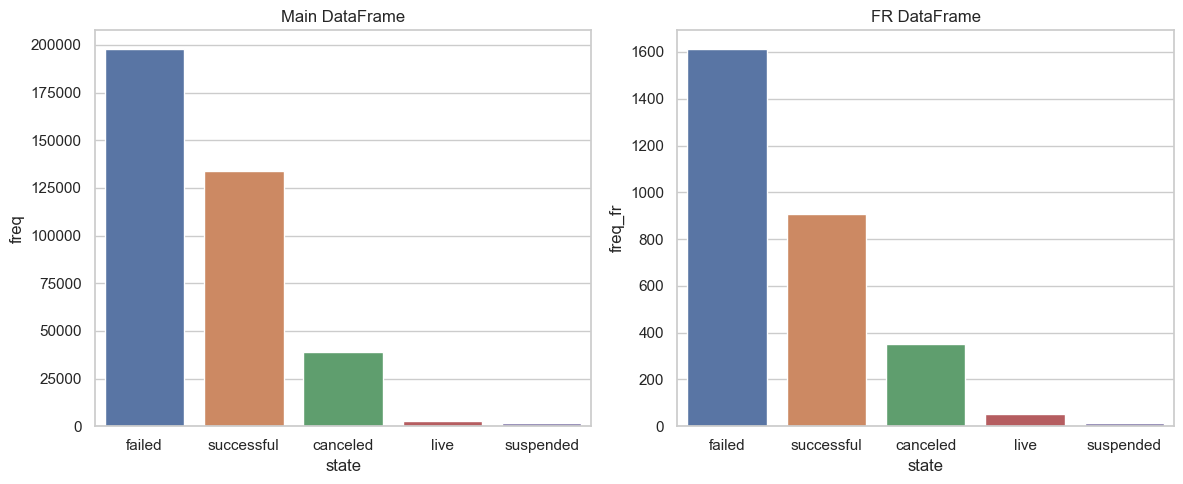

In [128]:
freq_count_df = df['state'].value_counts().reset_index(name='freq')
freq_count_df.columns = ['state', 'freq']

freq_count_df_fr = df_fr['state'].value_counts().reset_index(name='freq_fr')
freq_count_df_fr.columns = ['state', 'freq_fr']


sns.set(style='whitegrid')
plt.figure(figsize=(12, 5))

# Subplot 1 - Bar plot for main data frame
plt.subplot(1, 2, 1)
sns.barplot(x='state', y='freq', data=freq_count_df)
plt.title('Main DataFrame')

# Subplot 2 - Bar plot for data frame FR
plt.subplot(1, 2, 2)
sns.barplot(x='state', y='freq_fr', data=freq_count_df_fr)
plt.title('FR DataFrame')

plt.tight_layout()
plt.show()

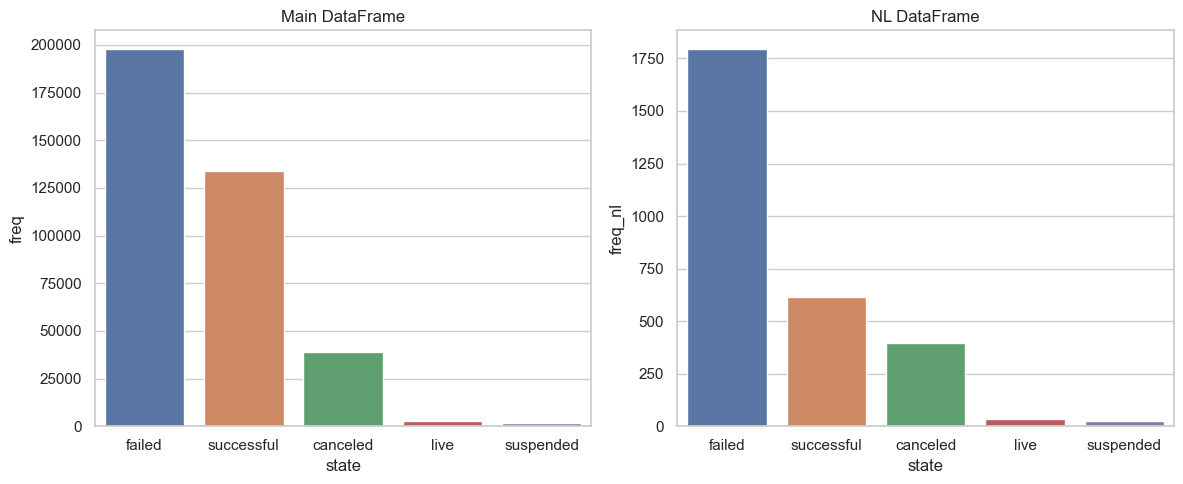

In [129]:
freq_count_df = df['state'].value_counts().reset_index(name='freq')
freq_count_df.columns = ['state', 'freq']

freq_count_df_nl = df_nl['state'].value_counts().reset_index(name='freq_nl')
freq_count_df_nl.columns = ['state', 'freq_nl']


sns.set(style='whitegrid')
plt.figure(figsize=(12, 5))

# Subplot 1 - Bar plot for main data frame
plt.subplot(1, 2, 1)
sns.barplot(x='state', y='freq', data=freq_count_df)
plt.title('Main DataFrame')

# Subplot 2 - Bar plot for data frame NL
plt.subplot(1, 2, 2)
sns.barplot(x='state', y='freq_nl', data=freq_count_df_nl)
plt.title('NL DataFrame')

plt.tight_layout()
plt.show()

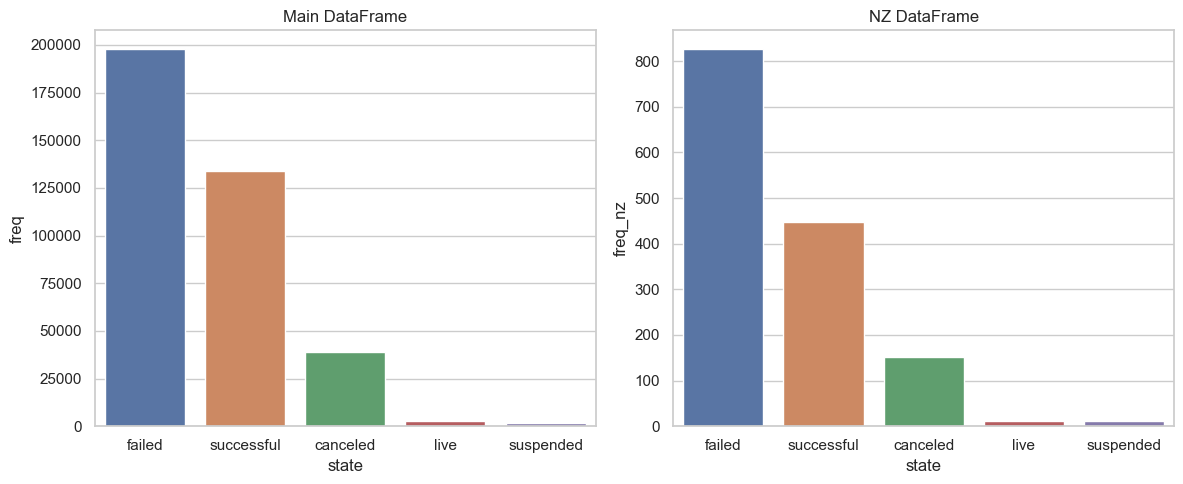

In [130]:
freq_count_df = df['state'].value_counts().reset_index(name='freq')
freq_count_df.columns = ['state', 'freq']

freq_count_df_nz = df_nz['state'].value_counts().reset_index(name='freq_nz')
freq_count_df_nz.columns = ['state', 'freq_nz']


sns.set(style='whitegrid')
plt.figure(figsize=(12, 5))

# Subplot 1 - Bar plot for main data frame
plt.subplot(1, 2, 1)
sns.barplot(x='state', y='freq', data=freq_count_df)
plt.title('Main DataFrame')

# Subplot 2 - Bar plot for data frame NZ
plt.subplot(1, 2, 2)
sns.barplot(x='state', y='freq_nz', data=freq_count_df_nz)
plt.title('NZ DataFrame')

plt.tight_layout()
plt.show()

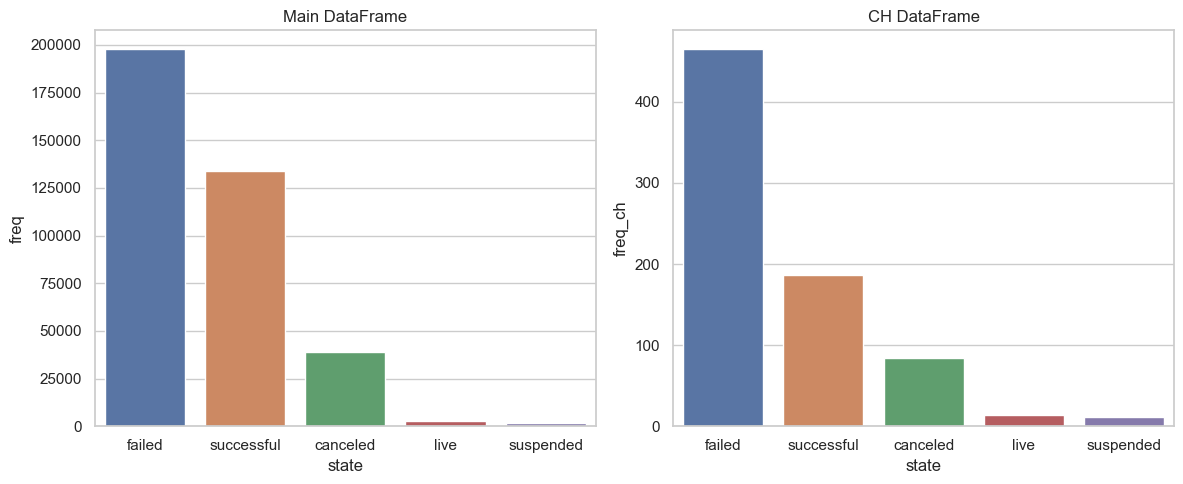

In [131]:
freq_count_df = df['state'].value_counts().reset_index(name='freq')
freq_count_df.columns = ['state', 'freq']

freq_count_df_ch = df_ch['state'].value_counts().reset_index(name='freq_ch')
freq_count_df_ch.columns = ['state', 'freq_ch']


sns.set(style='whitegrid')
plt.figure(figsize=(12, 5))

# Subplot 1 - Bar plot for main data frame
plt.subplot(1, 2, 1)
sns.barplot(x='state', y='freq', data=freq_count_df)
plt.title('Main DataFrame')

# Subplot 2 - Bar plot for data frame CH
plt.subplot(1, 2, 2)
sns.barplot(x='state', y='freq_ch', data=freq_count_df_ch)
plt.title('CH DataFrame')

plt.tight_layout()
plt.show()

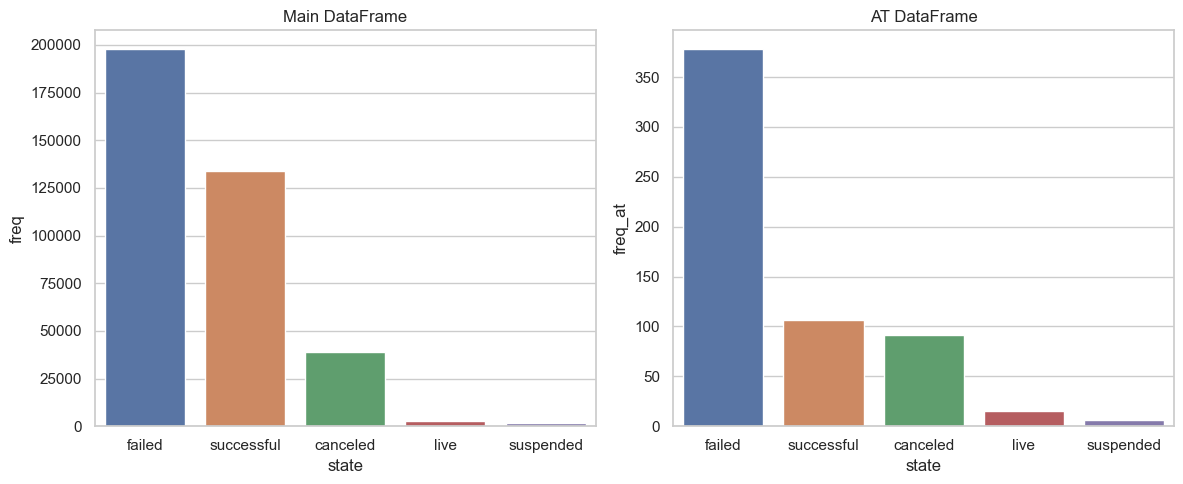

In [132]:
freq_count_df = df['state'].value_counts().reset_index(name='freq')
freq_count_df.columns = ['state', 'freq']

freq_count_df_at = df_at['state'].value_counts().reset_index(name='freq_at')
freq_count_df_at.columns = ['state', 'freq_at']


sns.set(style='whitegrid')
plt.figure(figsize=(12, 5))

# Subplot 1 - Bar plot for main data frame
plt.subplot(1, 2, 1)
sns.barplot(x='state', y='freq', data=freq_count_df)
plt.title('Main DataFrame')

# Subplot 2 - Bar plot for data frame AT
plt.subplot(1, 2, 2)
sns.barplot(x='state', y='freq_at', data=freq_count_df_at)
plt.title('AT DataFrame')

plt.tight_layout()
plt.show()

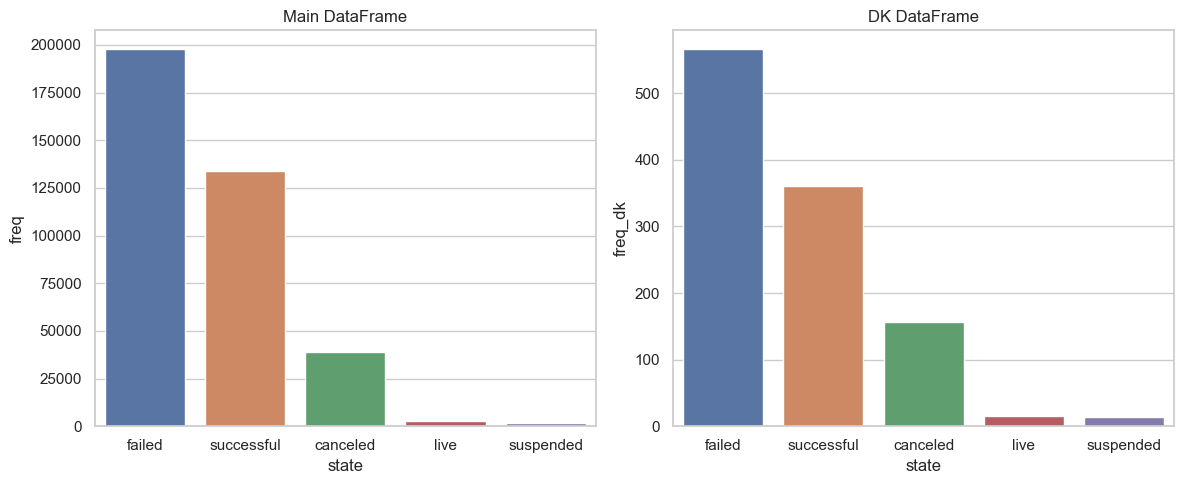

In [133]:
freq_count_df = df['state'].value_counts().reset_index(name='freq')
freq_count_df.columns = ['state', 'freq']

freq_count_df_dk = df_dk['state'].value_counts().reset_index(name='freq_dk')
freq_count_df_dk.columns = ['state', 'freq_dk']


sns.set(style='whitegrid')
plt.figure(figsize=(12, 5))

# Subplot 1 - Bar plot for main data frame
plt.subplot(1, 2, 1)
sns.barplot(x='state', y='freq', data=freq_count_df)
plt.title('Main DataFrame')

# Subplot 2 - Bar plot for data frame DK
plt.subplot(1, 2, 2)
sns.barplot(x='state', y='freq_dk', data=freq_count_df_dk)
plt.title('DK DataFrame')

plt.tight_layout()
plt.show()

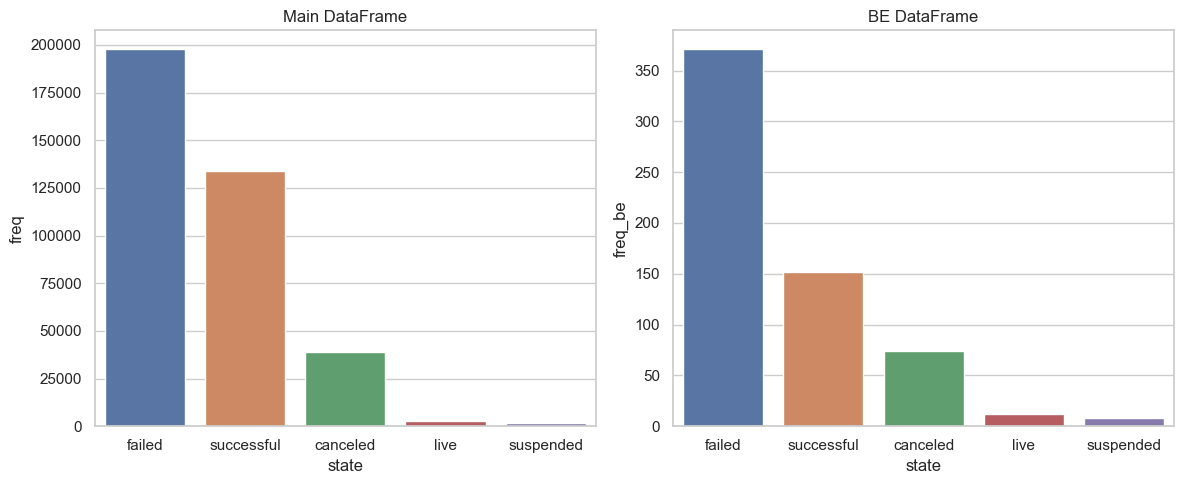

In [137]:
freq_count_df = df['state'].value_counts().reset_index(name='freq')
freq_count_df.columns = ['state', 'freq']

freq_count_df_be = df_be['state'].value_counts().reset_index(name='freq_be')
freq_count_df_be.columns = ['state', 'freq_be']


sns.set(style='whitegrid')
plt.figure(figsize=(12, 5))

# Subplot 1 - Bar plot for main data frame
plt.subplot(1, 2, 1)
sns.barplot(x='state', y='freq', data=freq_count_df)
plt.title('Main DataFrame')

# Subplot 2 - Bar plot for data frame BE
plt.subplot(1, 2, 2)
sns.barplot(x='state', y='freq_be', data=freq_count_df_be)
plt.title('BE DataFrame')

plt.tight_layout()
plt.show()

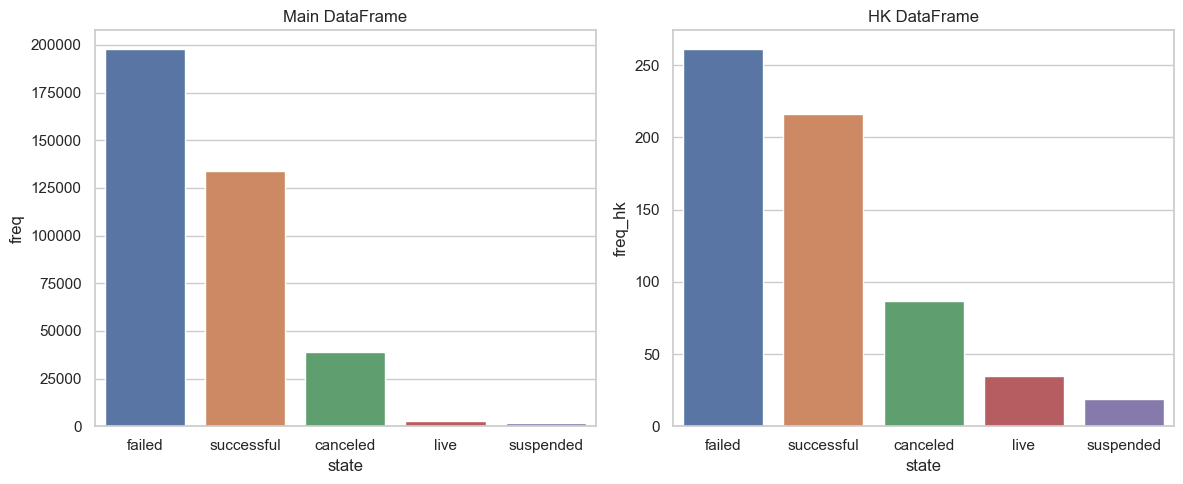

In [138]:
freq_count_df = df['state'].value_counts().reset_index(name='freq')
freq_count_df.columns = ['state', 'freq']

freq_count_df_hk = df_hk['state'].value_counts().reset_index(name='freq_hk')
freq_count_df_hk.columns = ['state', 'freq_hk']


sns.set(style='whitegrid')
plt.figure(figsize=(12, 5))

# Subplot 1 - Bar plot for main data frame
plt.subplot(1, 2, 1)
sns.barplot(x='state', y='freq', data=freq_count_df)
plt.title('Main DataFrame')

# Subplot 2 - Bar plot for data frame HK
plt.subplot(1, 2, 2)
sns.barplot(x='state', y='freq_hk', data=freq_count_df_hk)
plt.title('HK DataFrame')

plt.tight_layout()
plt.show()

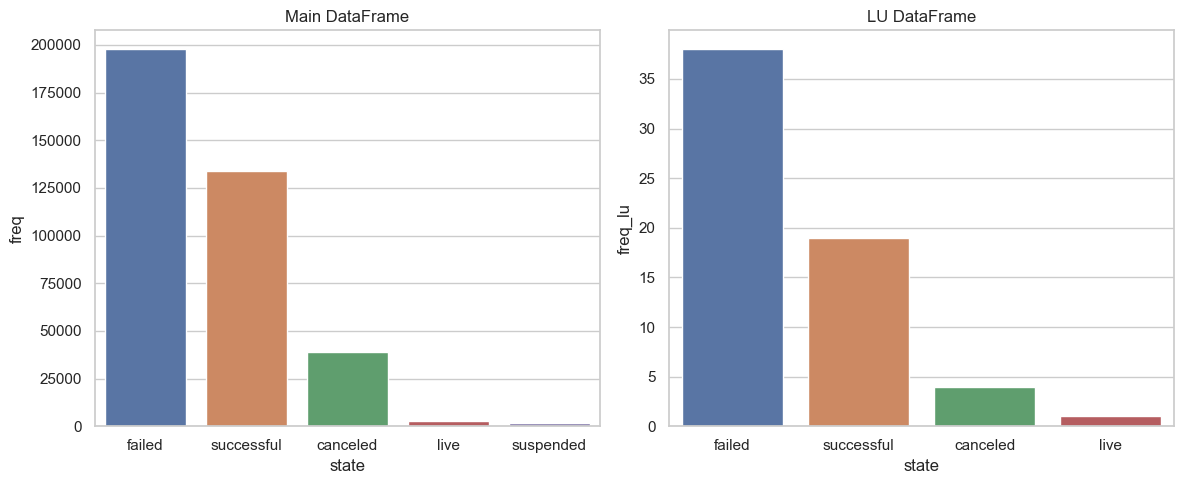

In [139]:
freq_count_df = df['state'].value_counts().reset_index(name='freq')
freq_count_df.columns = ['state', 'freq']

freq_count_df_lu = df_lu['state'].value_counts().reset_index(name='freq_lu')
freq_count_df_lu.columns = ['state', 'freq_lu']


sns.set(style='whitegrid')
plt.figure(figsize=(12, 5))

# Subplot 1 - Bar plot for main data frame
plt.subplot(1, 2, 1)
sns.barplot(x='state', y='freq', data=freq_count_df)
plt.title('Main DataFrame')

# Subplot 2 - Bar plot for data frame LU
plt.subplot(1, 2, 2)
sns.barplot(x='state', y='freq_lu', data=freq_count_df_lu)
plt.title('LU DataFrame')

plt.tight_layout()
plt.show()

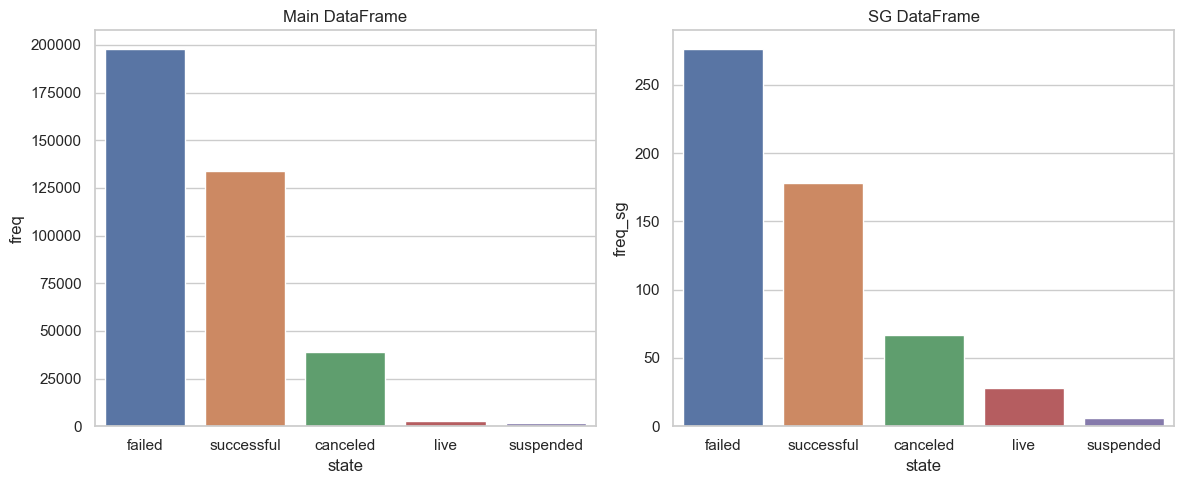

In [140]:
freq_count_df = df['state'].value_counts().reset_index(name='freq')
freq_count_df.columns = ['state', 'freq']

freq_count_df_sg = df_sg['state'].value_counts().reset_index(name='freq_sg')
freq_count_df_sg.columns = ['state', 'freq_sg']


sns.set(style='whitegrid')
plt.figure(figsize=(12, 5))

# Subplot 1 - Bar plot for main data frame
plt.subplot(1, 2, 1)
sns.barplot(x='state', y='freq', data=freq_count_df)
plt.title('Main DataFrame')

# Subplot 2 - Bar plot for data frame SG
plt.subplot(1, 2, 2)
sns.barplot(x='state', y='freq_sg', data=freq_count_df_sg)
plt.title('SG DataFrame')

plt.tight_layout()
plt.show()

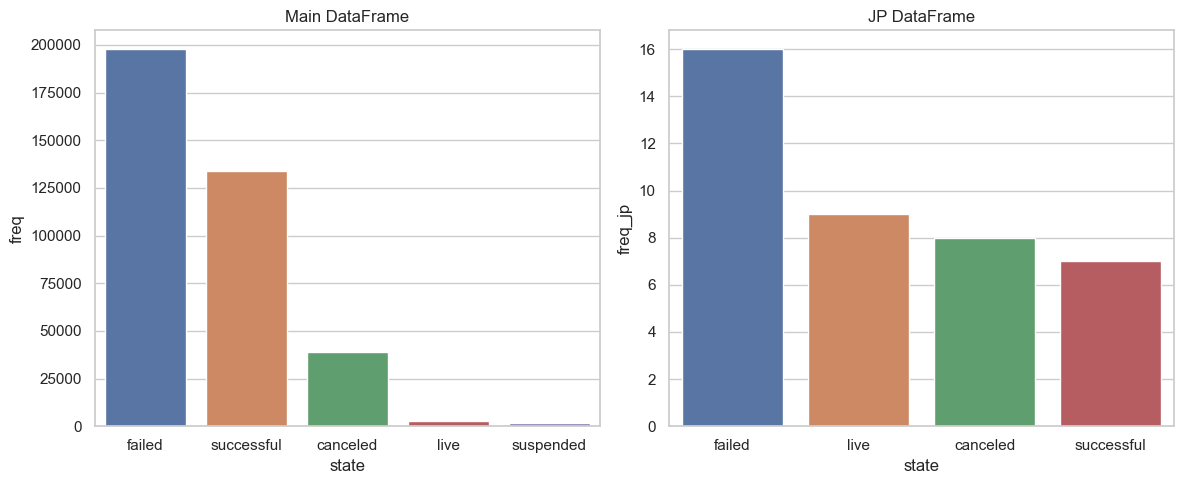

In [141]:
freq_count_df = df['state'].value_counts().reset_index(name='freq')
freq_count_df.columns = ['state', 'freq']

freq_count_df_jp = df_jp['state'].value_counts().reset_index(name='freq_jp')
freq_count_df_jp.columns = ['state', 'freq_jp']


sns.set(style='whitegrid')
plt.figure(figsize=(12, 5))

# Subplot 1 - Bar plot for main data frame
plt.subplot(1, 2, 1)
sns.barplot(x='state', y='freq', data=freq_count_df)
plt.title('Main DataFrame')

# Subplot 2 - Bar plot for data frame JP
plt.subplot(1, 2, 2)
sns.barplot(x='state', y='freq_jp', data=freq_count_df_jp)
plt.title('JP DataFrame')

plt.tight_layout()
plt.show()

In [176]:
df = pd.read_csv('ks-projects-201801.csv', encoding='latin_1')
df = df[df.state != 'undefined']
contingency_table = pd.crosstab(df['country'], df['state'])
contingency_table

state,canceled,failed,live,successful,suspended
country,,,,,
AT,91,378,15,107,6
AU,1065,4606,70,2010,88
BE,74,371,12,152,8
CA,2138,8236,132,4134,116
CH,84,465,14,187,11
DE,621,2499,75,937,39
DK,157,566,16,360,14
ES,331,1381,52,492,20
FR,353,1612,52,908,14


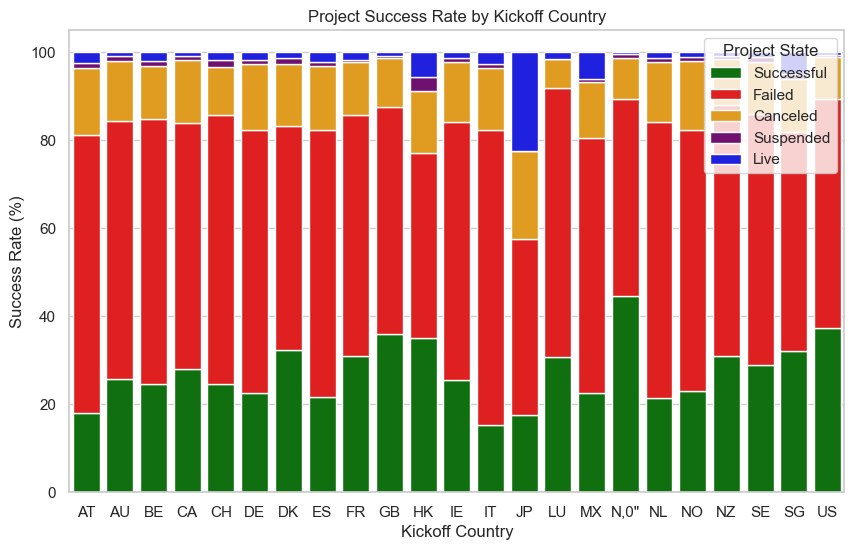

In [193]:
success_rates = df.groupby(['country', 'state']).size().unstack(fill_value=0)
success_rates_percent = success_rates.div(success_rates.sum(axis=1), axis=0) * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=success_rates_percent.index, y=success_rates_percent['successful'], color='green', label='Successful')
sns.barplot(x=success_rates_percent.index, y=success_rates_percent['failed'], color='red', bottom=success_rates_percent['successful'], label='Failed')
sns.barplot(x=success_rates_percent.index, y=success_rates_percent['canceled'], color='orange', bottom=success_rates_percent['successful'] + success_rates_percent['failed'], label='Canceled')
sns.barplot(x=success_rates_percent.index, y=success_rates_percent['suspended'], color='purple', bottom=success_rates_percent['successful'] + success_rates_percent['failed'] + success_rates_percent['canceled'], label='Suspended')
sns.barplot(x=success_rates_percent.index, y=success_rates_percent['live'], color='blue', bottom=success_rates_percent['successful'] + success_rates_percent['failed'] + success_rates_percent['canceled'] + success_rates_percent['suspended'], label='Live')

plt.title('Project Success Rate by Kickoff Country')
plt.xlabel('Kickoff Country')
plt.ylabel('Success Rate (%)')
plt.legend(title='Project State', loc='upper right')
plt.show()

